<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Obvious questions:

How to predict heart disease?
Is any variable very highly correlated to heart disease?

# Step 2: Find the Data

## Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the [**Blood Transfusion Service Center Data Set**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) in Hsin-Chu City in Taiwan.
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.
        e-mail:icyeh 'at' chu.edu.tw
        Tel: 886-3-5186511
        Date Donated: October 3, 2008 

- Citation Request:
- **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM 
    model using Bernoulli sequence, "Expert Systems with Applications, 2008 
    (doi:10.1016/j.eswa.2008.07.018).

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
# Read data in pandas

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

# Check data has loaded correctly

df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [6]:
#Most data cleaning and EDA already done in previous lab

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [8]:
# Filter/subset/clean the data according to your EDA findings

#Most data cleaning and EDA already done in previous lab



,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [14]:
#Scaling the data (standard scaling)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop('whether he/she donated blood in March 2007', axis = 1)
y = df['whether he/she donated blood in March 2007']

scaled_X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

scaled_X.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,-0.927899,7.623346,7.623346,2.615633
1,-1.175118,1.282738,1.282738,-0.257881


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [ ]:
#Trying a random forest model for this lab

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [25]:
# Define ML model(s)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

#Using GridSearchCV to find optimal hyperparameters

from sklearn.model_selection import GridSearchCV
forest_cv = GridSearchCV(estimator = forest,
                         param_grid = {'n_estimators' : np.arange(10,200,20),
                                       'criterion' : ['gini','entropy']
                                      })

forest_cv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])})

In [26]:
#Check best parameters:

print('Best parameters for Random Forest:', forest_cv.best_params_)

Best parameters for Random Forest: {'criterion': 'gini', 'n_estimators': 30}


# Step 9: Fit the Model

In [ ]:
#Already done

In [ ]:
m

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [44]:
#Check model for imbalance:

print(forest_cv.cv_results_['mean_test_score'].reshape(4,5))

#Scores between Cross-validation folds look similar, doesn't indicate imbalance


[[0.77053465 0.78247525 0.76651485 0.76655446 0.77053465]
 [0.77251485 0.77651485 0.76651485 0.77051485 0.77251485]
 [0.77643564 0.76455446 0.77851485 0.77051485 0.77651485]
 [0.77851485 0.77851485 0.77453465 0.77451485 0.77451485]]


In [99]:
print('Training score:',forest_cv.score(X_train,y_train))
print('Testing score:',forest_cv.score(X_test,y_test))

print('\n')
print('Looks like overfitting!')


Training score: 0.9600798403193613
Testing score: 0.7327935222672065


Looks like overfitting!


In [101]:
#RandomForestClassifier has no regularization parameter

#How to control overfitting?

AttributeError: type object 'RandomForestClassifier' has no attribute 'params_'

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [48]:
#Generate predictions

predictions = forest_cv.predict(X_test)

from sklearn.metrics import accuracy_score

print('Random forest accuracy:',accuracy_score(y_test, predictions))

print('Parameters for random forest:', forest_cv.best_params_)

Random forest accuracy: 0.7327935222672065
Parameters for random forest: {'criterion': 'gini', 'n_estimators': 30}


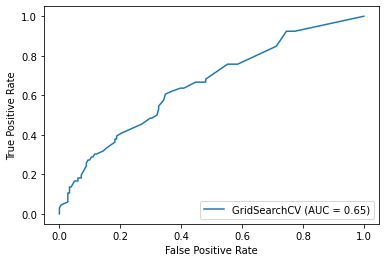

In [106]:
#Plotting rock curve to examine false against true positive rates:

from sklearn.metrics import plot_roc_curve

plot_roc_curve(estimator = forest_cv,
               X = X_test,
               y = y_test,)


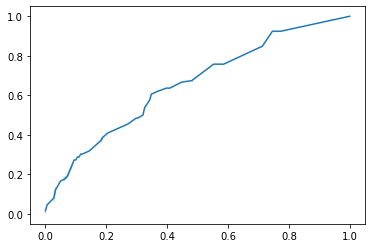

In [73]:
#Plotting manually but getting the same graph:

from sklearn.metrics import roc_curve

proba_predictions = forest_cv.predict_proba(X_test)

fpr,tpr,thresholds = roc_curve(y_test, [i[1] for i in proba_predictions])

sns.lineplot(x = fpr,
             y = tpr)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

© 2020 Institute of Data